# Chaptre 7 Matplotlibを使ったデータ可視化

# 7-1 データの可視化

## 7-1-1 データの可視化について

## 7-1-2 この章で使用するライブラリのインポート

In [320]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

# 7-2 データ可視化の基礎

## 7-2-1 棒グラフ

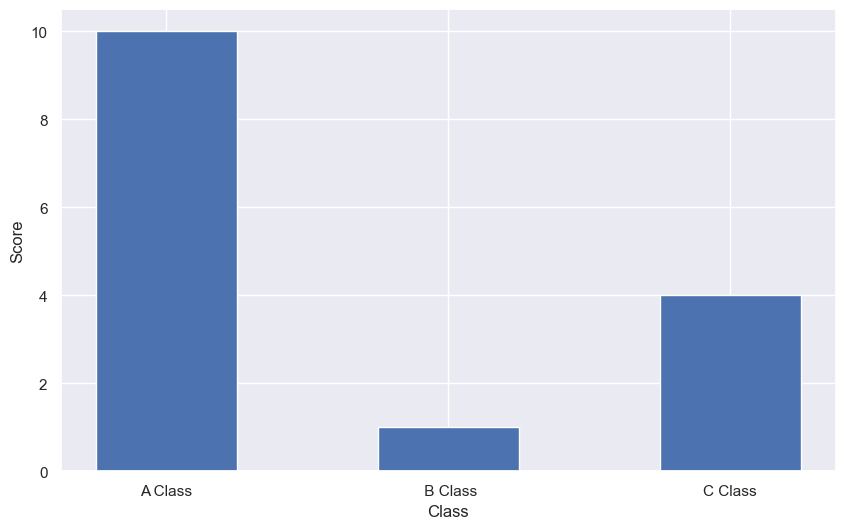

In [321]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定
plt.figure(figsize= (10,6))

plt.bar(x, y, align='center', width=0.5)

# 棒グラフそれぞれのラベル
plt.xticks(x, ['A Class', ' B Class', 'C Class'])

# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')

plt.grid(True)

### 1-1 横の棒グラフ

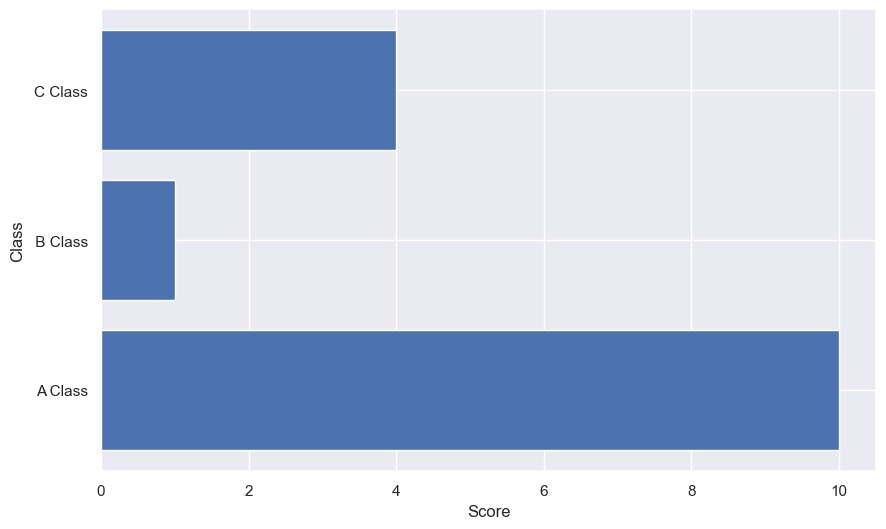

In [322]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定
plt.figure(figsize= (10,6))

# barhで横向きに表示
plt.barh(x, y, align='center')

# ラベルのx軸y軸を入れ替えることに注意
plt.yticks(x, ['A Class', ' B Class', 'C Class'])
plt.ylabel('Class')
plt.xlabel('Score')

plt.grid(True)

### 1-2 複数のグラフを描く

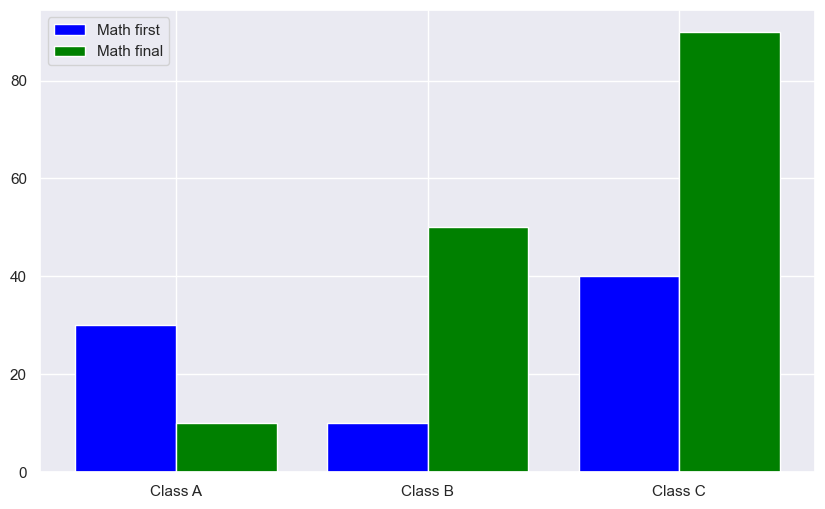

In [323]:
# データの準備
y1 = np.array([30,10,40])
y2 = np.array([10,50,90])

# x軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.4

plt.figure(figsize=(10,6))

# グラフの描画
plt.bar(x, y1, color='blue', width=w, label='Math first', align='center')
plt.bar(x + w, y2, color='green', width=w, label='Math final', align='center')

# 凡例を最適な位置に配置
plt.legend(loc='best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

In [324]:
### 1-3 積み上げ棒グラフ

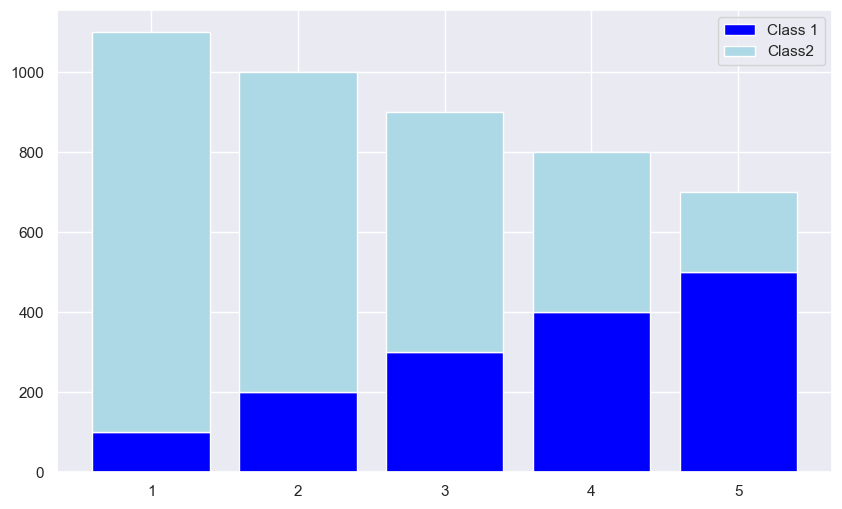

In [325]:
# データの準備
height1 = np.array([100,200,300,400,500])
height2 = np.array([1000,800,600,400,200])

# x軸
x = np.array([1,2,3,4,5])

plt.figure(figsize=(10,6))

# グラフの描画
p1 = plt.bar(x, height1, color='blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')

# 凡例を表示
plt.legend((p1[0], p2[0]), ('Class 1', 'Class2'))

## 7-2-2 円グラフ
### 2-1 一般的な円グラフ

(-1.200, 1.105, -1.100, 1.100)

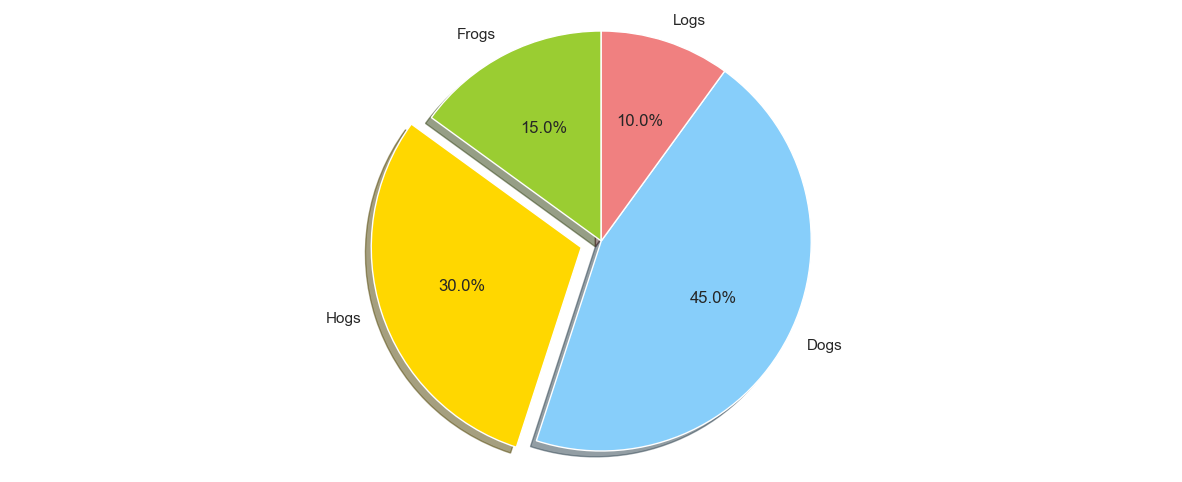

In [326]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15,30,45,10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)

plt.figure(figsize=(15,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle= 90)
plt.axis('equal')

### 2-2 バブルチャート

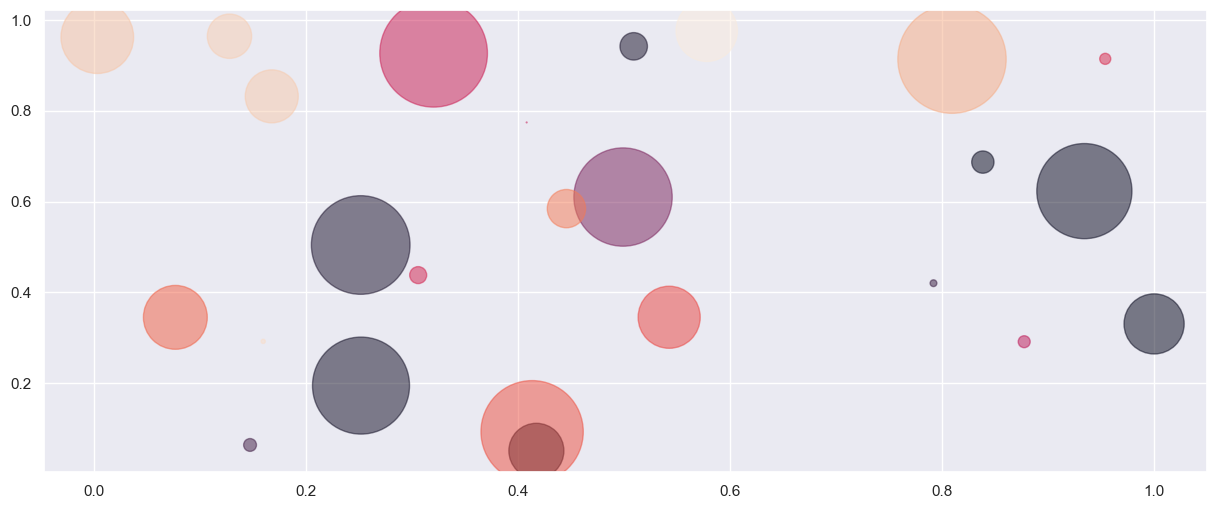

In [327]:
N = 25

# X, Yデータをランダムに生成
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさをばらけさせる
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

plt.figure(figsize=(15,6))
plt.scatter(x, y, s = area, c = colors ,alpha = 0.5)
plt.grid(True)

### 練習問題 7-1 

In [328]:
# 3章でも使用した数学の点数のデータを使用
import requests, zipfile
from io import StringIO
import io

#データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

#データをurlから取得する
r = requests.get(url, stream=True)

#zipファイルを読み書きする
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データをDataframeとして読み込む
student_data_math = pd.read_csv('student-mat.csv')
#区切りに;がついているので要注意
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [329]:
student_data_math['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

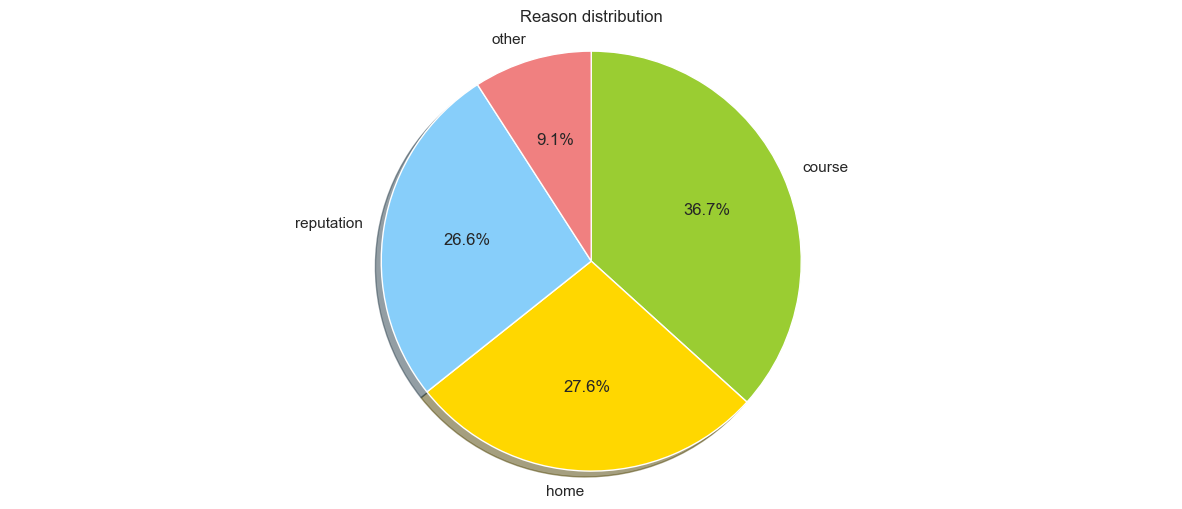

In [330]:
import matplotlib.pyplot as plt

# reason列の値のカウントを取得
sizes = student_data_math['reason'].value_counts()

# ラベルを取得（ユニークな値のリスト）
labels = sizes.index.tolist()

# カウントをリストに変換
sizes = sizes.tolist()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)

plt.figure(figsize=(15, 6))
# counterclock=False と設定することで時計回りに表示させる
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)
plt.axis('equal')  # 円を真円にする

plt.title('Reason distribution')
plt.show()


### 練習問題 7-2

In [331]:
student_data_math.groupby('higher')['G3'].mean()

higher
no      6.800
yes    10.608
Name: G3, dtype: float64

Text(0, 0.5, 'Score')

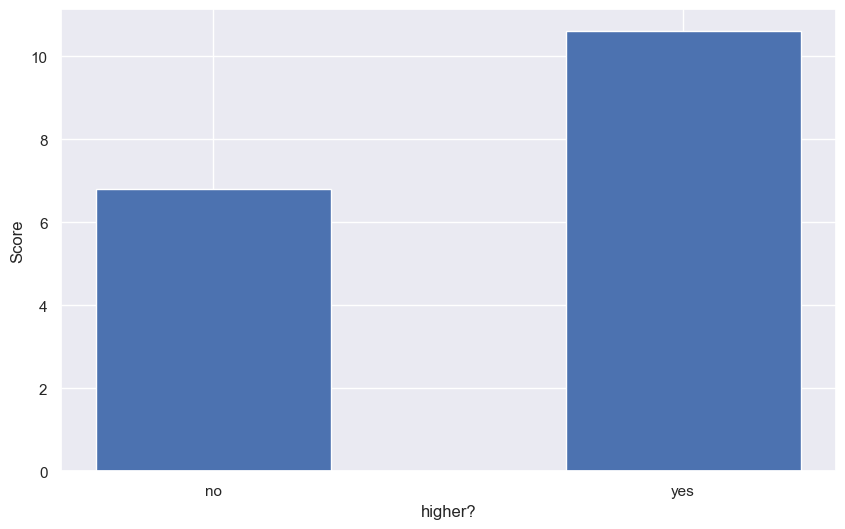

In [332]:
x = [1,2]
y = student_data_math.groupby('higher')['G3'].mean().tolist()
plt.figure(figsize= (10,6))
plt.bar(x, y, align='center', width=0.5)
plt.xticks(x, ['no', 'yes'])
# xとyのラベルを設定
plt.xlabel('higher?')
plt.ylabel('Score')

当然かもだが、高い教育を受けている子の方が点数が高い傾向にある

### 練習問題 7-3

In [333]:
student_data_math.groupby('traveltime')['G3'].mean()

traveltime
1    10.782101
2     9.906542
3     9.260870
4     8.750000
Name: G3, dtype: float64

Text(0.5, 0, 'Score')

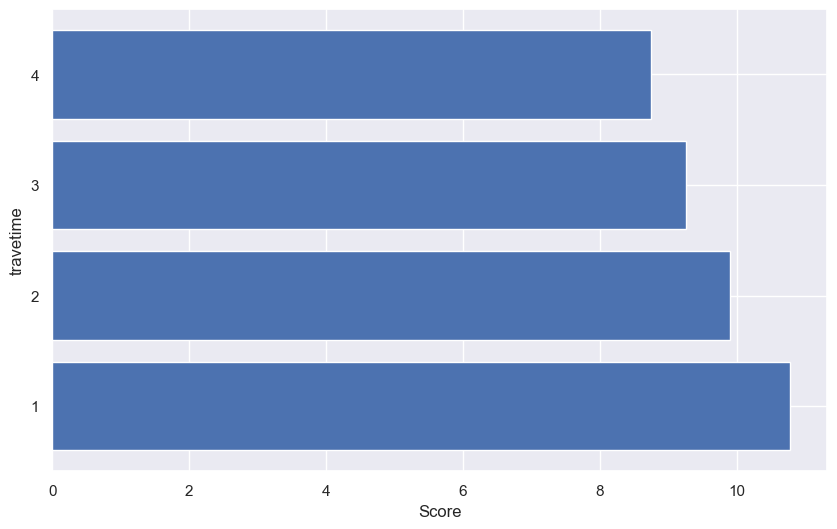

In [334]:
# 表示するデータ
x = [1, 2, 3, 4]
y = student_data_math.groupby('traveltime')['G3'].mean().tolist()

# グラフの大きさ指定
plt.figure(figsize= (10,6))

# barhで横向きに表示
plt.barh(x, y, align='center')

# ラベルのx軸y軸を入れ替えることに注意
plt.yticks(x, ['1', '2', '3', '4'])
plt.ylabel('travetime')
plt.xlabel('Score')

もしかして、距離が長い→勉強時間が確保しずらい→学力低下という可能性が！？

# 7-3 応用：金融データの可視化

## 7-3-1 可視化する金融データ

In [335]:
# 日付データの設定。freq='T'で1分ごとにデータを生成する。
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生。-1か1を発生させる。
dn = np.random.randint(2, size=len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積和を算出している
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータを営業日単位でサンプリング
# ohlcメソッドで「open」「high」「low」「close」の4つのデータにする
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_92876/3995497716.py:2: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



<Axes: >

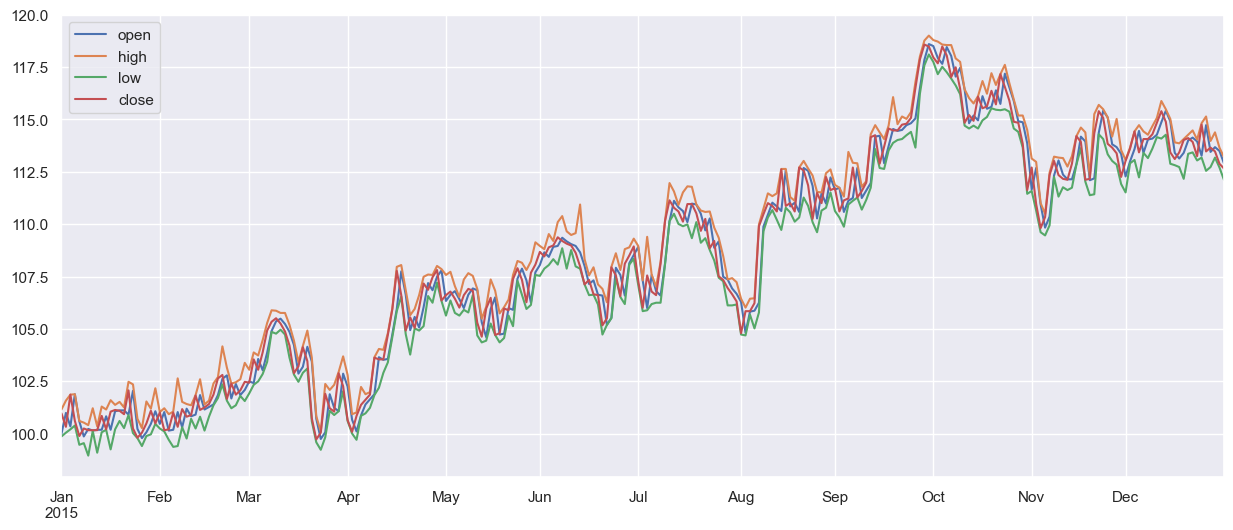

In [336]:
df.plot(figsize=(15,6), legend='best', grid=True)

## 7-3-2 ローソクチャートを表示するライブラリ

In [337]:
# plotlyライブラリのインポート
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as FF  # figure_factoryの正しいインポート

# jupyter notebook 用の設定
init_notebook_mode(connected=True)

# ローソクチャートの設定
fig = FF.create_candlestick(df['open'], df['high'], df['low'], df['close'], dates=df.index)

fig.update_layout(height=800)

# グラフの描画
iplot(fig)

/opt/anaconda3/lib/python3.12/site-packages/plotly/figure_factory/_ohlc.py:29: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/lib/python3.12/site-packages/plotly/figure_factory/_ohlc.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/lib/python3.12/site-packages/plotly/figure_factory/_candlestick.py:241: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/opt/anaconda3/lib/python3.12/site-packages/plotly/fi

## 7章　総合問題
### 総合問題 7-1 時系列データ分析

#### 1. データの取得と確認

In [338]:
# データのインポート
import requests, zipfile
from io import StringIO
import io

#データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'

#データをurlから取得する
r = requests.get(url, stream=True)

#zipファイルを読み書きする
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データをDataframeとして読み込む
dow_jones_index = pd.read_csv('dow_jones_index.data')
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [339]:
# NaNがどのくらいあるか確認
dow_jones_index.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [340]:
dow_jones_index.describe()

,quarter,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000
mean,1.520000,1.175478e+08,0.050262,5.593627,1.173876e+08,0.238468,52.525333,0.691826
std,0.499933,1.584381e+08,2.517809,40.543478,1.592322e+08,2.679538,46.335098,0.305482
min,1.000000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,-15.422900,0.000000,0.065574
25%,1.000000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,-1.222068,24.000000,0.534549
50%,2.000000,5.306088e+07,0.000000,0.512586,5.294556e+07,0.101193,47.000000,0.681067
75%,2.000000,1.327218e+08,1.650888,21.800622,1.333230e+08,1.845562,69.000000,0.854291
max,2.000000,1.453439e+09,9.882230,327.408924,1.453439e+09,9.882230,336.000000,1.564210


In [341]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

#### 2. データの加工

In [342]:
# datetime型に変更
dow_jones_index['date'] = pd.to_datetime(dow_jones_index['date'], format='%m/%d/%Y')

In [343]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    object        
 4   high                                750 non-null    object        
 5   low                                 750 non-null    object        
 6   close                               750 non-null    object        
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

In [344]:
dow_jones_index.head(3)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.42849,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.47066,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.63831,12,0.189994


In [345]:
dow_jones_index['next_weeks_open'] = dow_jones_index['next_weeks_open'].str.replace('$', '').astype(float)
dow_jones_index['next_weeks_close'] = dow_jones_index['next_weeks_close'].str.replace('$', '').astype(float)
dow_jones_index['open'] = dow_jones_index['open'].str.replace('$', '').astype(float)
dow_jones_index['high'] = dow_jones_index['high'].str.replace('$', '').astype(float)
dow_jones_index['low'] = dow_jones_index['low'].str.replace('$', '').astype(float)
dow_jones_index['close'] = dow_jones_index['close'].str.replace('$', '').astype(float)

In [346]:
dow_jones_index.head(3)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.42849,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.47066,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.63831,12,0.189994


In [347]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

#### 3. カラムのcloseについて、各stockごとの要約統計量を算出してください

In [348]:
dow_jones_index.groupby('stock')['close'].describe()

,count,mean,std,min,25%,50%,75%,max
stock,,,,,,,,
AA,25.0,16.5044,0.772922,14.72,16.03,16.52,17.10,17.92
AXP,25.0,46.7124,2.396248,43.53,44.36,46.25,48.50,51.19
BA,25.0,73.4480,3.087631,69.10,71.64,72.69,74.84,79.78
BAC,25.0,13.0516,1.417382,10.52,11.93,13.37,14.25,15.25
CAT,25.0,103.1520,6.218651,92.75,99.59,103.54,107.21,115.41
CSCO,25.0,17.8992,1.984095,14.93,16.88,17.52,18.70,22.05
CVX,25.0,101.1756,5.267066,91.19,97.90,102.10,103.75,109.66
DD,25.0,52.8736,2.367048,48.35,50.29,52.91,54.63,56.79
DIS,25.0,41.2496,1.882473,37.58,39.45,41.52,42.95,43.56


#### 4. カラムのcloseについて、各stockの相関を算出する相関行列を出してください。seabornのheatmap関数を使用して、相関行列のヒートマップを描いてみましょう（pandasのcorrメソッドを使用します）

In [349]:

# データフレームをピボットして、各株式の 'close' をカラムにする
pivot_df = dow_jones_index.pivot(index='date', columns='stock', values='close')
pivot_df

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28
2011-02-11,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82
2011-02-18,17.28,45.53,73.04,14.75,105.86,18.85,98.72,55.98,43.56,21.44,...,32.85,27.06,19.19,64.30,28.57,60.92,85.01,36.62,55.38,84.50
2011-02-25,16.68,43.53,72.30,14.20,102.00,18.64,102.10,54.07,42.95,20.82,...,32.19,26.55,18.86,62.84,28.13,59.60,83.37,35.97,51.75,85.34
2011-03-04,16.58,43.72,71.80,14.12,103.04,18.40,103.75,53.87,43.55,20.37,...,33.06,25.95,19.66,62.03,27.92,59.18,82.86,36.08,52.07,85.08


stock        AA       AXP        BA       BAC       CAT      CSCO       CVX  \
stock                                                                         
AA     1.000000 -0.132094  0.291520  0.432240  0.695727  0.277191  0.470529   
AXP   -0.132094  1.000000  0.792575 -0.746595  0.255515 -0.593743  0.236456   
BA     0.291520  0.792575  1.000000 -0.536545  0.627205 -0.465162  0.568946   
BAC    0.432240 -0.746595 -0.536545  1.000000 -0.131058  0.813696 -0.295246   
CAT    0.695727  0.255515  0.627205 -0.131058  1.000000 -0.375140  0.889416   
CSCO   0.277191 -0.593743 -0.465162  0.813696 -0.375140  1.000000 -0.548609   
CVX    0.470529  0.236456  0.568946 -0.295246  0.889416 -0.548609  1.000000   
DD     0.762246  0.004094  0.417249  0.129762  0.902856 -0.175626  0.753270   
DIS    0.772470 -0.129064  0.350917  0.421660  0.712870  0.067161  0.555978   
GE     0.740139 -0.315425  0.139263  0.568918  0.463054  0.362102  0.266078   
HD     0.744726 -0.201676  0.208978  0.461699  0.617

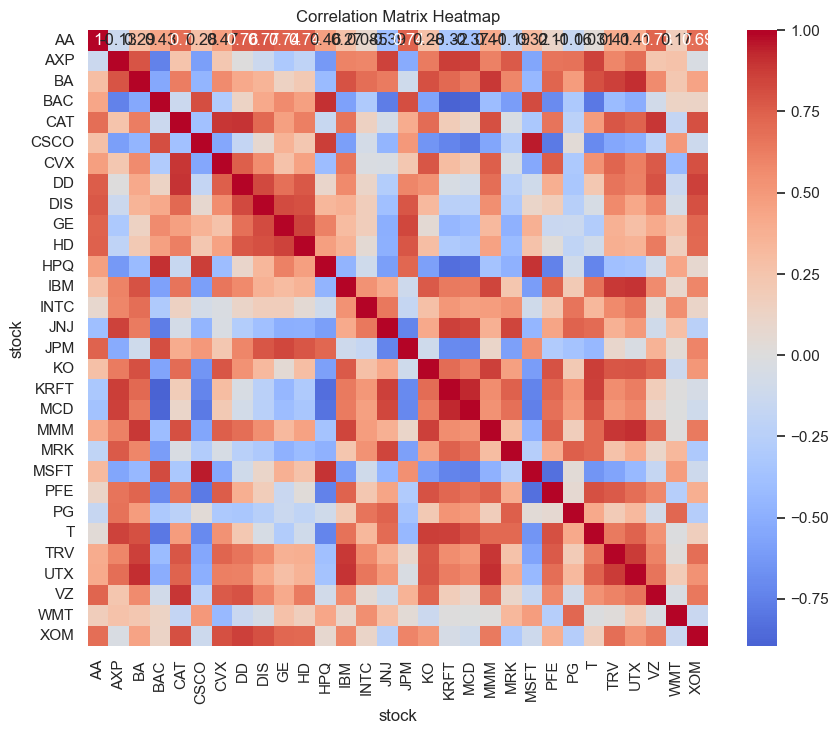

In [350]:
# 'close' カラムについての相関行列を計算
correlation_matrix = pivot_df.corr()

# 相関行列の表示
print(correlation_matrix)

# 相関行列のヒートマップを描画
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [355]:
# 上三角行列を取り出して、対角線を除く
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 最大の相関係数を持つインデックスを取得
max_corr = upper_tri.unstack().idxmax()

# 最大の相関係数とその値を取得
max_corr_value = upper_tri.unstack().max()

print(f"最大の相関係数を持つ株の組み合わせ: {max_corr}")
print(f"相関係数: {max_corr_value}")

最大の相関係数を持つ株の組み合わせ: ('MSFT', 'CSCO')
相関係数: 0.9537216645891363


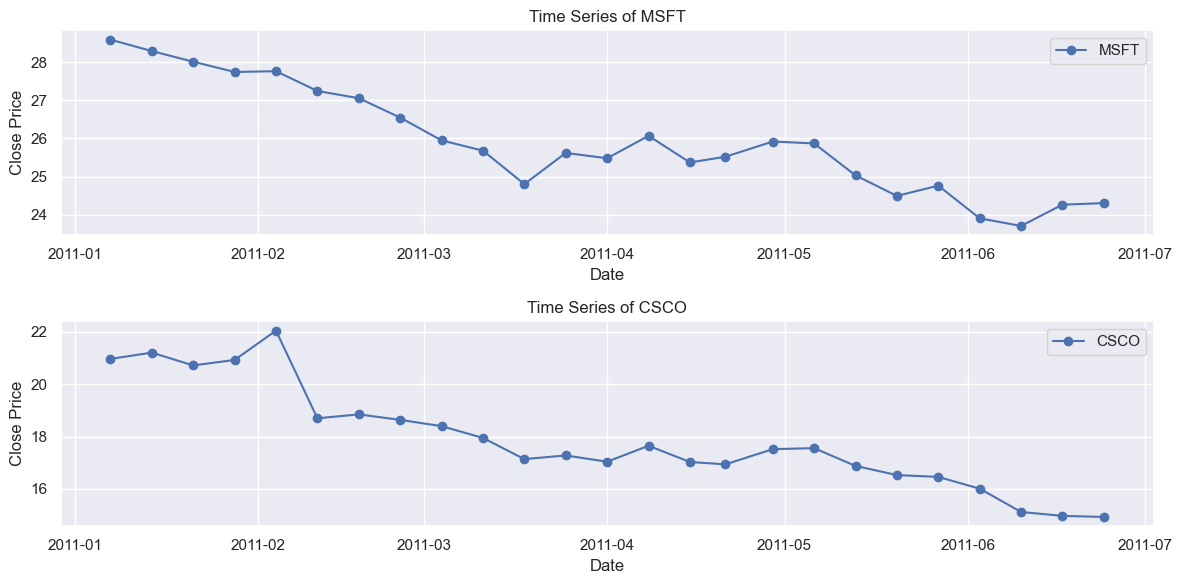

In [356]:
# 時系列グラフを描画
stock1, stock2 = max_corr
plt.figure(figsize=(12, 6))

# Stock 1 の時系列グラフ
plt.subplot(2, 1, 1)
plt.plot(pivot_df.index, pivot_df[stock1], marker='o', linestyle='-', label=stock1)
plt.title(f'Time Series of {stock1}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Stock 2 の時系列グラフ
plt.subplot(2, 1, 2)
plt.plot(pivot_df.index, pivot_df[stock2], marker='o', linestyle='-', label=stock2)
plt.title(f'Time Series of {stock2}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

6. Pandasのrollingメソッドを使用して、各stockごとにcloseの過去5週間移動平均時系列データを計算してください

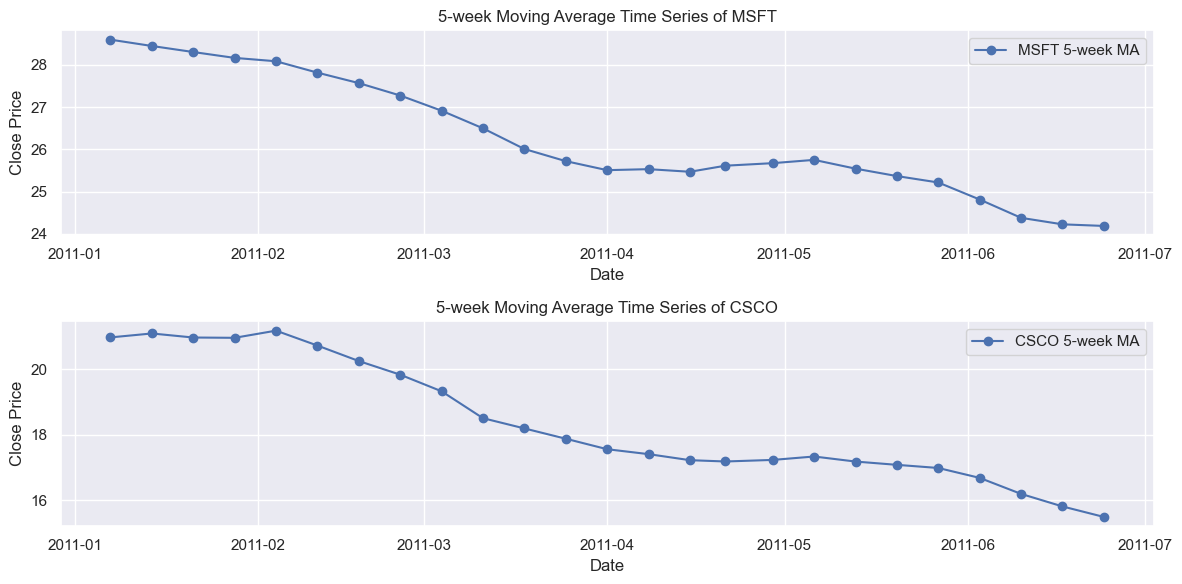

In [357]:
# 各stockごとにcloseの過去5週間移動平均時系列データを計算
rolling_mean_df = pivot_df.rolling(window=5, min_periods=1).mean()

# 時系列グラフを描画
stock1, stock2 = max_corr
plt.figure(figsize=(12, 6))

# Stock 1 の移動平均時系列グラフ
plt.subplot(2, 1, 1)
plt.plot(rolling_mean_df.index, rolling_mean_df[stock1], marker='o', linestyle='-', label=f'{stock1} 5-week MA')
plt.title(f'5-week Moving Average Time Series of {stock1}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Stock 2 の移動平均時系列グラフ
plt.subplot(2, 1, 2)
plt.plot(rolling_mean_df.index, rolling_mean_df[stock2], marker='o', linestyle='-', label=f'{stock2} 5-week MA')
plt.title(f'5-week Moving Average Time Series of {stock2}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

#### 7.Pandasのshiftメソッドを用いて、stockごとにcloseの前期(1週間)との比の対数時系列データを計算せよ。その中で一番ボラティリティが大きいstockと一番小さいstockを抜き出し、その対数変化率グラフを表示してください

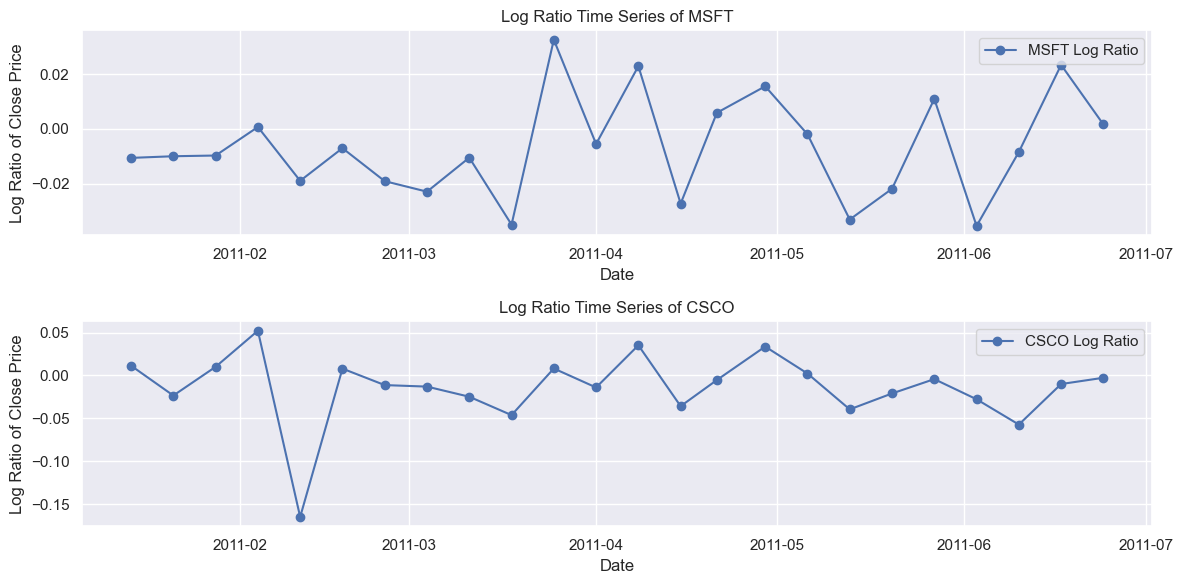

In [358]:
# 各stockごとにcloseの前期(1週間)との比の対数時系列データを計算
log_ratio_df = np.log(pivot_df / pivot_df.shift(1))

# 時系列グラフを描画
stock1, stock2 = max_corr
plt.figure(figsize=(12, 6))

# Stock 1 の対数比時系列グラフ
plt.subplot(2, 1, 1)
plt.plot(log_ratio_df.index, log_ratio_df[stock1], marker='o', linestyle='-', label=f'{stock1} Log Ratio')
plt.title(f'Log Ratio Time Series of {stock1}')
plt.xlabel('Date')
plt.ylabel('Log Ratio of Close Price')
plt.legend()

# Stock 2 の対数比時系列グラフ
plt.subplot(2, 1, 2)
plt.plot(log_ratio_df.index, log_ratio_df[stock2], marker='o', linestyle='-', label=f'{stock2} Log Ratio')
plt.title(f'Log Ratio Time Series of {stock2}')
plt.xlabel('Date')
plt.ylabel('Log Ratio of Close Price')
plt.legend()

plt.tight_layout()
plt.show()

ボラティリティが最大の株: CSCO (標準偏差: 0.0412054399651625)
ボラティリティが最小の株: KO (標準偏差: 0.016230490366417206)


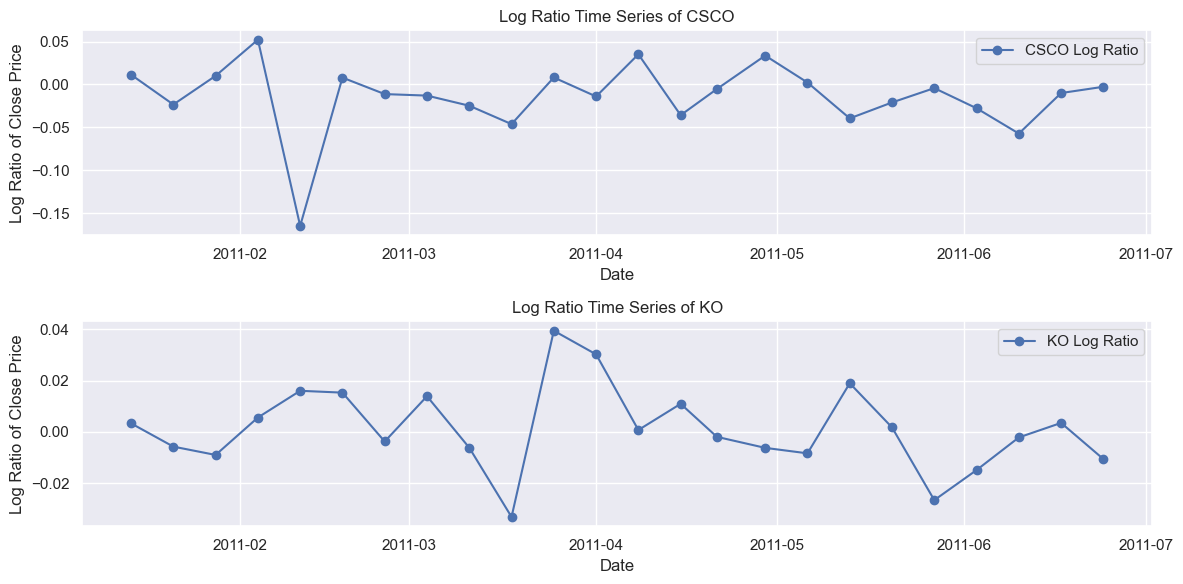

In [359]:
# 各stockごとにcloseの前期(1週間)との比の対数時系列データを計算
log_ratio_df = np.log(pivot_df / pivot_df.shift(1))

# ボラティリティ（標準偏差）を計算
volatility = log_ratio_df.std()

# ボラティリティが最大の株と最小の株を抽出
max_vol_stock = volatility.idxmax()
min_vol_stock = volatility.idxmin()

print(f"ボラティリティが最大の株: {max_vol_stock} (標準偏差: {volatility[max_vol_stock]})")
print(f"ボラティリティが最小の株: {min_vol_stock} (標準偏差: {volatility[min_vol_stock]})")

# ボラティリティが最大の株と最小の株の対数変化率時系列グラフを描画
plt.figure(figsize=(12, 6))

# ボラティリティが最大の株の対数変化率時系列グラフ
plt.subplot(2, 1, 1)
plt.plot(log_ratio_df.index, log_ratio_df[max_vol_stock], marker='o', linestyle='-', label=f'{max_vol_stock} Log Ratio')
plt.title(f'Log Ratio Time Series of {max_vol_stock}')
plt.xlabel('Date')
plt.ylabel('Log Ratio of Close Price')
plt.legend()

# ボラティリティが最小の株の対数変化率時系列グラフ
plt.subplot(2, 1, 2)
plt.plot(log_ratio_df.index, log_ratio_df[min_vol_stock], marker='o', linestyle='-', label=f'{min_vol_stock} Log Ratio')
plt.title(f'Log Ratio Time Series of {min_vol_stock}')
plt.xlabel('Date')
plt.ylabel('Log Ratio of Close Price')
plt.legend()

plt.tight_layout()
plt.show()

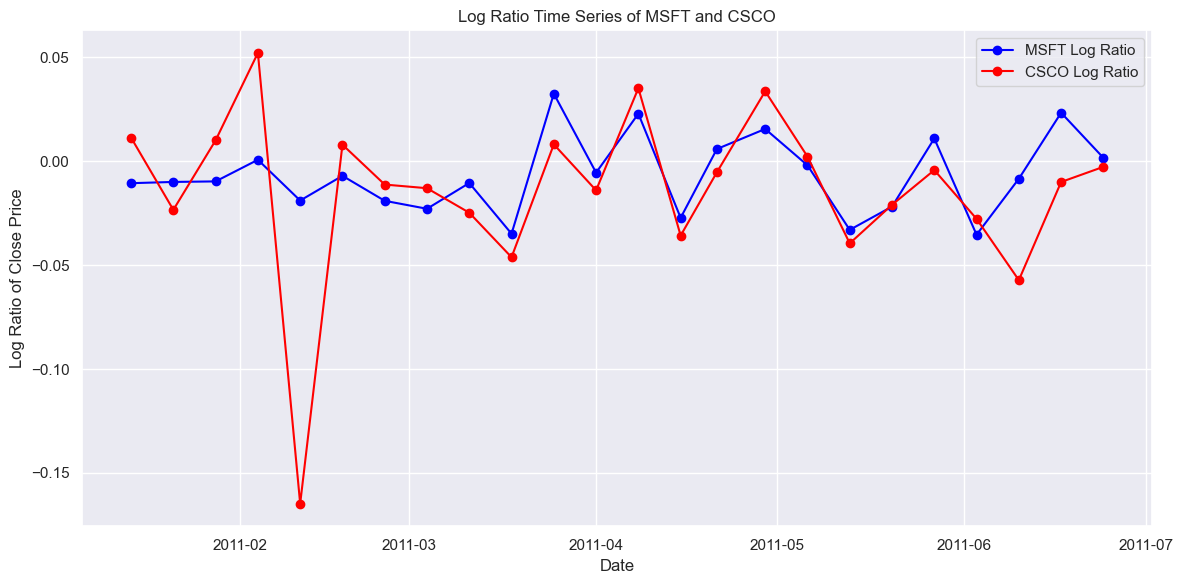

In [360]:
# 時系列グラフを重ねて描画
plt.figure(figsize=(12, 6))

# 最初のグラフ (最初に見つけた相関が最大のペアの1つの株)
stock1, stock2 = max_corr
plt.plot(log_ratio_df.index, log_ratio_df[stock1], marker='o', linestyle='-', label=f'{stock1} Log Ratio', color='blue')

# ボラティリティが最大の株の対数変化率時系列グラフ
plt.plot(log_ratio_df.index, log_ratio_df[max_vol_stock], marker='o', linestyle='-', label=f'{max_vol_stock} Log Ratio', color='red')

plt.title(f'Log Ratio Time Series of {stock1} and {max_vol_stock}')
plt.xlabel('Date')
plt.ylabel('Log Ratio of Close Price')
plt.legend()

plt.tight_layout()
plt.show()

### 総合問題 7-2 マーケティング分析

#### 1. データの読み込み

#### 2. それぞれのユニーク数を求める

#### 3. それぞれの国の購買合計金額を高順に並べよ

#### 4. 上位5カ国の売り上げの月別の時系列推移をグラフにせよ

#### 5. 上位5カ国のトップ5商品を抽出せよ。それらを国ごとに円グラフにして。

In [362]:
import requests
import pandas as pd

# データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

# データをurlから取得する
r = requests.get(url, stream=True)

# 取得したデータをExcelファイルとして読み込む
with open('Online_Retail.xlsx', 'wb') as f:
    f.write(r.content)

# PandasのExcelFileを使用して、シートを指定して読み込む
excel_file = pd.ExcelFile('Online_Retail.xlsx')
df = excel_file.parse('Online Retail')

# DataFrameの表示
print(df.head())